# Бенчмарк

Для задачи **Digital Reputation Challenge**

https://boosters.pro

автор: Александр Дьяконов https://dyakonov.org

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## загрузка данных

In [4]:
TRAIN_PATH = 'train/'
X1 = pd.read_csv(TRAIN_PATH + 'X1.csv')
X2 = pd.read_csv(TRAIN_PATH + 'X2.csv')
X3 = pd.read_csv(TRAIN_PATH + 'X3.csv')
Y = pd.read_csv(TRAIN_PATH + 'Y.csv')
print (X1.shape, X2.shape, X3.shape, Y.shape)

(4000, 26) (462888, 2) (4000, 453) (4000, 6)


In [5]:
Y.columns = ['Y' + s if s != 'id' else 'id' for s in Y.columns]

In [6]:
TEST_PATH = 'test/'
X1_test = pd.read_csv(TEST_PATH + 'X1.csv')
X2_test = pd.read_csv(TEST_PATH + 'X2.csv')
X3_test = pd.read_csv(TEST_PATH + 'X3.csv')
print (X1_test.shape, X2_test.shape, X3_test.shape)

(4058, 26) (470083, 2) (4058, 453)


# Подготовка обучения и теста

используем только матрицу 1

In [7]:
X = X1.copy()
X = X.merge(Y)
        
id_ = X.pop('id')
y1 = X.pop('Y1')
y2 = X.pop('Y2')
y3 = X.pop('Y3')
y4 = X.pop('Y4')
y5 = X.pop('Y5')

X_test = X1_test.copy()
id__ = X_test.pop('id')

### Эксперименты

делаются так...

In [9]:
import lightgbm as lgb

param = {'n_estimators':1000, 'num_leaves':6, 'objective':'binary',
         'learning_rate': 0.05, 'colsample_bytree': 0.75, 'subsample': 0.75,
        'metric': 'auc'}
         
w = lgb.cv(param, lgb.Dataset(X, label=y1),
           stratified=False,
           num_boost_round=1000, nfold=4, verbose_eval=100)
max(w['auc-mean'])

/home/alexander/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:390: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	cv_agg's auc: 0.600372 + 0.0184634
[200]	cv_agg's auc: 0.597381 + 0.0157782
[300]	cv_agg's auc: 0.5931 + 0.0141725
[400]	cv_agg's auc: 0.590727 + 0.0117742
[500]	cv_agg's auc: 0.587088 + 0.0124422
[600]	cv_agg's auc: 0.586458 + 0.0104644
[700]	cv_agg's auc: 0.587516 + 0.00971511
[800]	cv_agg's auc: 0.587225 + 0.0104176
[900]	cv_agg's auc: 0.585616 + 0.0111163
[1000]	cv_agg's auc: 0.584474 + 0.0119534


0.6026030903311532

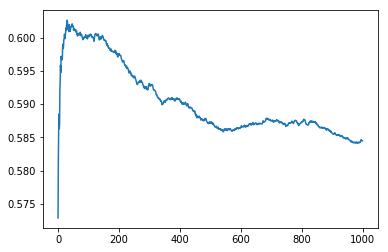

In [10]:
plt.plot(w['auc-mean'])

# Подготовка ответа

In [11]:
a1 = 0.0
for t in range(10):
    model1 = lgb.LGBMClassifier(learning_rate=0.01, num_leaves=6,
                                n_estimators=290,
                                colsample_bytree=0.75, subsample=0.75, random_state=t)
    model1.fit(X, y1)
    a = model1.predict_proba(X_test)[:,1]
    # print (a)
    a1 += a
a1 = a1 / 10

In [12]:
a2 = 0.0
for t in range(10):
    model2 = lgb.LGBMClassifier(learning_rate=0.03, num_leaves=2,
                          n_estimators=378,
                          colsample_bytree=0.75, subsample=0.75, random_state=t)
    model2.fit(X, y2)
    a = model2.predict_proba(X_test)[:,1]
    a2 += a
a2 = a2 / 10

In [13]:
a3 = 0.0
for t in range(10):
    model3 = lgb.LGBMClassifier(learning_rate=0.01, num_leaves=4,
                          n_estimators=543,
                          colsample_bytree=0.75, subsample=0.75, random_state=t)
    model3.fit(X, y3)
    a = model3.predict_proba(X_test)[:,1]
    a3 += a
a3 = a3 / 10

In [14]:
a4 = 0.0
for t in range(10):
    model4 = lgb.LGBMClassifier(learning_rate=0.003, num_leaves=6,
                          n_estimators=618,
                          colsample_bytree=0.75, subsample=0.75, random_state=t)
    model4.fit(X, y4)
    a = model4.predict_proba(X_test)[:,1]
    a4 += a
a4 = a4 / 10

In [15]:
a5 = 0.0
for t in range(10):
    model5 = lgb.LGBMClassifier(learning_rate=0.002, num_leaves=3,
                          n_estimators=516,
                          colsample_bytree=0.75, subsample=0.75, random_state=t)
    model5.fit(X, y5)
    a = model5.predict_proba(X_test)[:,1]
    #print (a)
    a5 += a
a5 = a5 / 10

In [16]:
df = pd.DataFrame({'id': X1_test.id.values,
             '1': a1,
             '2': a2,
             '3': a3,
             '4': a4,
             '5': a5})
df.to_csv('mmp_baseline_.csv', index=False)
df.head()

,id,1,2,3,4,5
0,0,0.341597,0.336250,0.253492,0.300679,0.428683
1,1,0.345812,0.227194,0.300929,0.282622,0.466563
2,2,0.437719,0.484228,0.226082,0.307257,0.444477
3,4,0.322215,0.274412,0.244045,0.301236,0.394336
4,7,0.366907,0.253626,0.435525,0.380312,0.456793
